42+ questions and 25,973 responses

Note :- Responses to multiple choice questions (only a single choice can be selected) were recorded in individual columns. Responses to multiple selection questions (multiple choices can be selected) were split into multiple columns (with one column per answer choice

In [2]:
# Mounting drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install hist

     |████████████████████████████████| 1.4 MB 17.4 MB/s 


In [4]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hist

In [5]:
#Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle Ml and DS survey/kaggle_survey_2021_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#First 5 columns
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [7]:
print(f"The shape of the data is {df.shape}")

The shape of the data is (25974, 369)


In [8]:
#The Null rows basically signifies that this was question with multiple answers, and we have done a One Hot Encoding
# of all the choices available, so its natural that there might be some null values in each column
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                         0
                                       ...  
Q38_B_Part_8                           24953
Q38_B_Part_9                           25307
Q38_B_Part_10                          23226
Q38_B_Part_11                          21431
Q38_B_OTHER                            25596
Length: 369, dtype: int64

<h1> Section 1 </h1>

Lets start looking at the questions one by one, and for each question we will derive some basic informations

In [9]:
#first 20 questions
for i in df.iloc[0][1:20]:
  print(i)

What is your age (# years)?
What is your gender? - Selected Choice
In which country do you currently reside?
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++
What programming languages do you use on a regular basis? (Select all that apply

In [10]:
#column names
columns=df.columns[1:]

In [11]:
#Utility functions
def pie_chart(column_name,df,numb):
  df_new=df[column_name]
  labels=df_new.value_counts().keys()[0:-1]
  data=df_new.value_counts().values[0:-1]
  plt.figure(figsize=(7,7))
  plt.title(str(df.iloc[0][numb+1]))
  plt.pie(data,labels=labels,shadow=True,autopct='%1.1f%%')
  plt.show()

def bar_chart(column_name,df,numb):
  df_new=df[column_name]
  plt.figure(figsize=(7,7))
  plt.title(str(df.iloc[0][numb+1]))
  df_new.value_counts()[0:20].plot(kind="barh")
  plt.show()

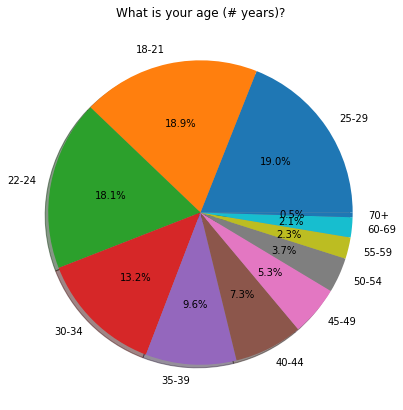

In [12]:
# Q1 What is your age (# years)?
                  
pie_chart(columns[0],df,0)

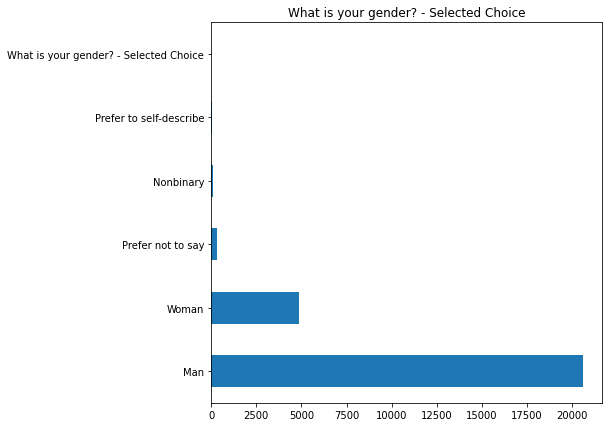

In [13]:
# Q2 What is your gender? - Selected Choice

bar_chart(columns[1],df,1)

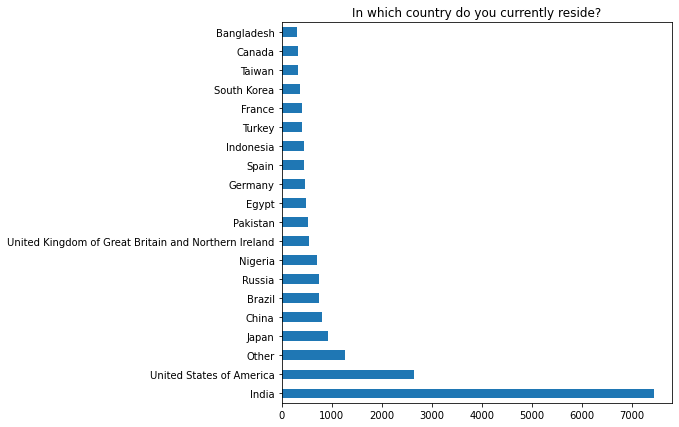

In [14]:
# Q3 In which country do you currently reside?

bar_chart(columns[2],df,2)

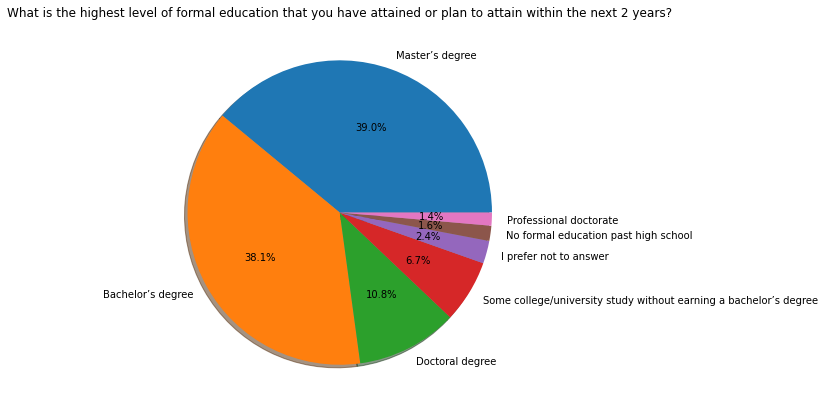

In [15]:
# Q4 What is the highest level of formal education that
# you have attained or plan to attain within the next 2 years?

pie_chart(columns[3],df,3)

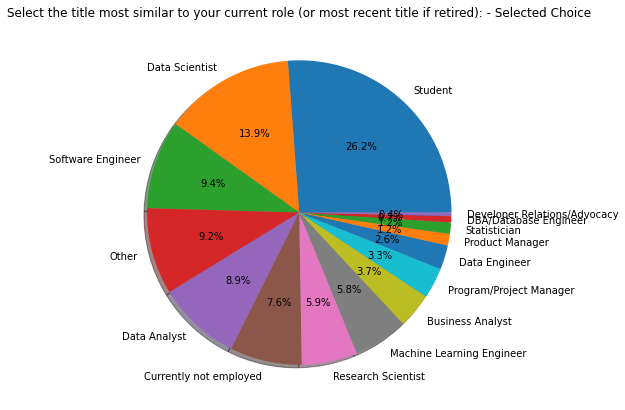

In [16]:
# Q5 Select the title most similar to your current role (or most recent title if retired)

pie_chart(columns[4],df,4)

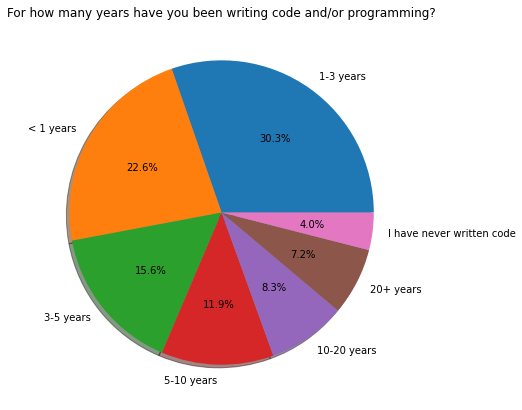

In [17]:
# Q6 For how many years have you been writing code and/or programming?

pie_chart(columns[5],df,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


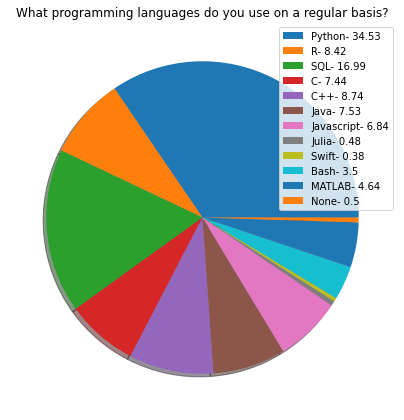

In [18]:
#Q7 What programming languages do you use on a regular basis?


def fav_language():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,13):
    data.append(df['Q7_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q7_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("What programming languages do you use on a regular basis?")
  plt.pie(data,shadow=True)
  plt.legend(legend_labels)
  plt.show()

fav_language()

<b>Note :- when I write data science or data scientist I refer to all the related fields also like data analyst,ML engineer etc.</b>

From above analysis we can see that the graeter percentage of the data is between the age group of 18-30. The number of males in data science and ML sector is more than the female and other geneder by a pretty big margin. 

<b>India has the greatest number of data dcience professionals or students. This means we can expect India to  become as a data science hub in the mere future.</b>

Data Scientist is the most liked role followed software engineer. The greater number of data scientists in the world have a master's degree.


<h1> 2nd section </h2>

Now lets create some more queries by combining the two or more features

Q1. Which is your current role wrt country and wrt data scienece

Q2. what is your highest level of formal education wrt country

Q3. Age and geneder wrt country

In [19]:
df[df['Q3']=='India']['Q5'].value_counts()

Student                         2845
Data Scientist                   883
Software Engineer                737
Currently not employed           633
Data Analyst                     564
Other                            508
Machine Learning Engineer        382
Business Analyst                 231
Program/Project Manager          181
Research Scientist               175
Data Engineer                    147
Product Manager                   53
Statistician                      39
DBA/Database Engineer             37
Developer Relations/Advocacy      19
Name: Q5, dtype: int64

In [20]:
df[df['Q3']=='India']['Q4'].value_counts()

Bachelor’s degree                                                    4008
Master’s degree                                                      2439
Doctoral degree                                                       330
Some college/university study without earning a bachelor’s degree     321
I prefer not to answer                                                198
Professional doctorate                                                 89
No formal education past high school                                   49
Name: Q4, dtype: int64

In [21]:
#This implies that most of the data scientists in India have a bachelor's or a master's degree. However, in India
# we can assume that the bachelors's degree refers to btech 

df[(df['Q5']=="Data Scientist") & (df['Q3']=='India')]['Q4'].value_counts()

Bachelor’s degree                                                    418
Master’s degree                                                      385
Doctoral degree                                                       31
Some college/university study without earning a bachelor’s degree     21
I prefer not to answer                                                16
Professional doctorate                                                 8
No formal education past high school                                   4
Name: Q4, dtype: int64

In [22]:
df[df['Q3']=='India']['Q1'].value_counts()

18-21    2719
22-24    1795
25-29    1275
30-34     695
35-39     407
40-44     284
45-49     141
50-54      59
55-59      33
60-69      20
70+         6
Name: Q1, dtype: int64

<h1>Section 3</h1>

In [23]:
#next 52 questions
for i in df.iloc[0][20:72]:
  print(i)

What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) 
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio 
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio 
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) 
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm 
Which of the following integrated development environments (IDE's)

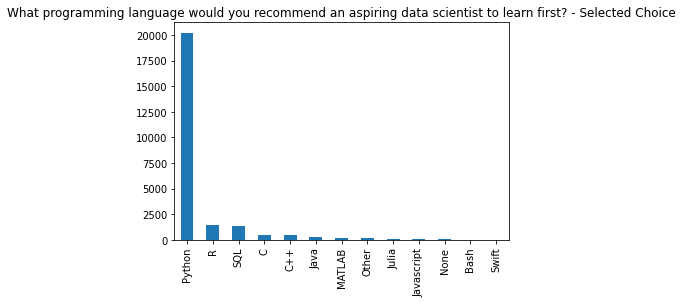

In [24]:
#Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
#Python is by farthe most popular langauge followed by R and SQL

plt.title(df['Q8'].value_counts().keys()[-1])
df['Q8'].value_counts()[0:-1].plot(kind='bar')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


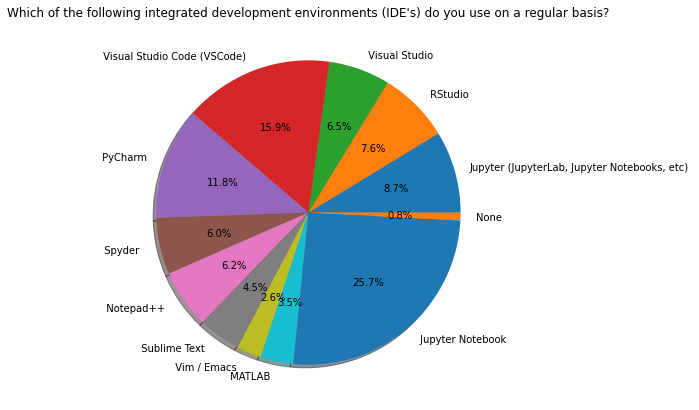

In [25]:
#Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?

def fav_IDE():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,13):
    data.append(df['Q9_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q9_Part_'+str(i)].value_counts()[0:1].keys()[0])

  # for i in range(0,len(data)):
  #   temp=((data[i]/sum(data))*100).round(2)
  #   legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,7))
  plt.title("Which of the following integrated development environments (IDE's) do you use on a regular basis?")
  plt.pie(data,shadow=True,autopct='%1.1f%%',labels=labels)
  plt.show()

fav_IDE()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


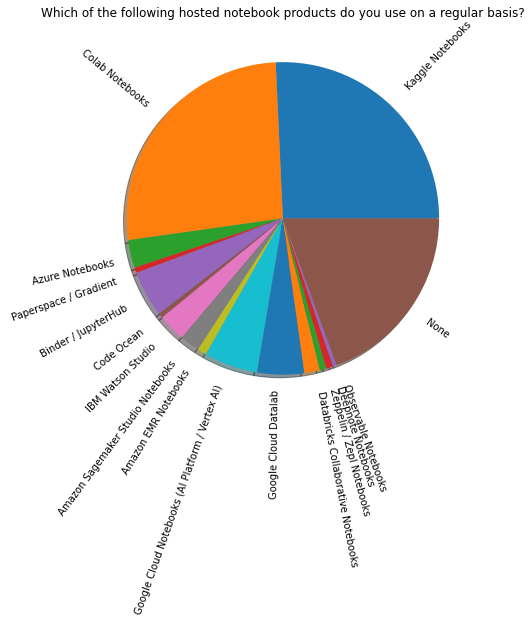

In [26]:
#Q10 Which of the following hosted notebook products do you use on a regular basis?

def fav_hostedNotebook():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,17):
    data.append(df['Q10_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q10_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which of the following hosted notebook products do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,rotatelabels=185)
  plt.show()

fav_hostedNotebook()

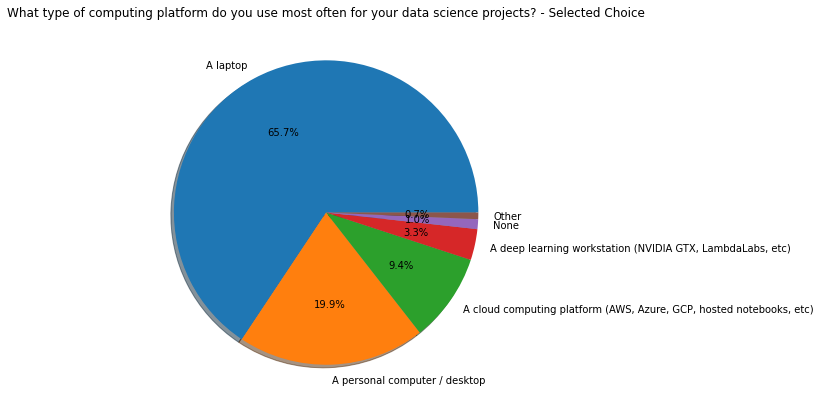

In [27]:
# Q11 What type of computing platform do you use most often for your data science projects? 

pie_chart(columns[50],df,50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


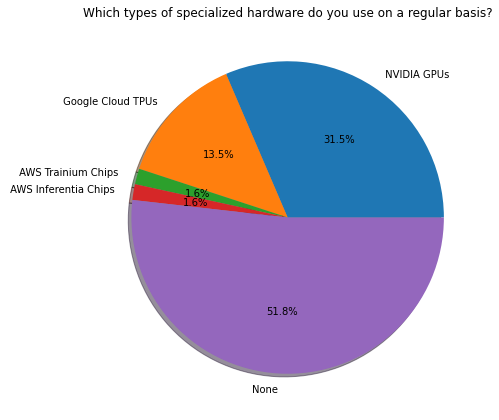

In [28]:
#Q12 Which types of specialized hardware do you use on a regular basis? 

def fav_hardware():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,6):
    data.append(df['Q12_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q12_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which types of specialized hardware do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,autopct='%1.1f%%')
  plt.show()

fav_hardware()

In [29]:
columns[69]

'Q14_OTHER'

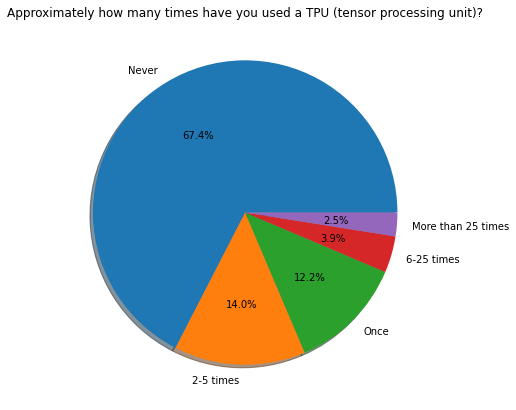

In [30]:
# Q13 Approximately how many times have you used a TPU (tensor processing unit)?

pie_chart(columns[57],df,57)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


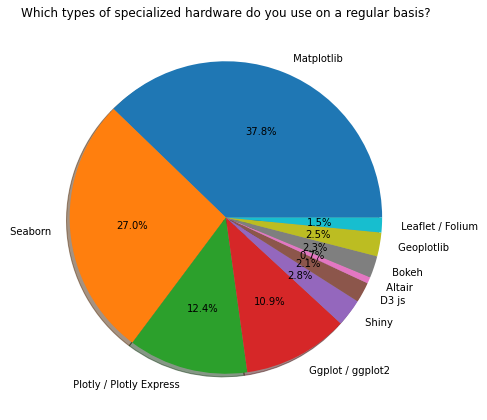

In [31]:
#Q14 What data visualization libraries or tools do you use on a regular basis?

def fav_visLib():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,11):
    data.append(df['Q14_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q14_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which types of specialized hardware do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,autopct='%1.1f%%')
  plt.show()

fav_visLib()

In [32]:
columns[70]

'Q15'

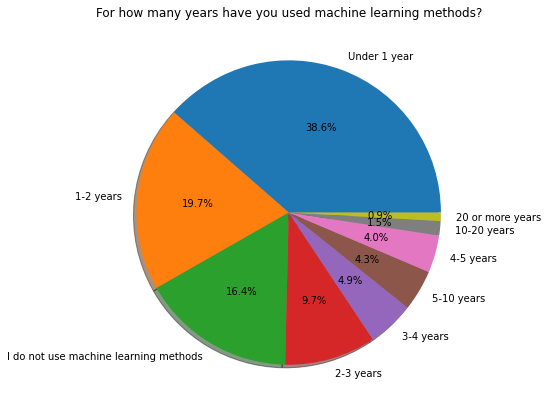

In [33]:
# Q15 For how many years have you used machine learning methods?

pie_chart(columns[70],df,70)

<ul>
<li>Python is by far the popular programming language for data scientists followed by R and SQL. 
<li>The most favourite IDE is Jupyter notebook followed by VS Code and Pycharm. However, many people also use google colab and kaggle notebooks because they have similar interface as jupyter notebook, and theyalso provide with free GPU and TPU service upto a limit, which might be very beneficial for small projects and for begineers.
<li> Most of the people use laptop for their projects or a personal computer. Also, most of the high laptops come with inbuilt Nvidia GPUs.
<li>Matplotlib is the most used visualization library followed by seaborn and plotify.
<li> The machine learning and deep learning methods have earned more popularity in the recent 3-4 years, this implies that it is a pretty indemand skill right now in the market.
 

<h1>Section 4</h1>

In [89]:
#next all questions
for i in df.iloc[0][72:]:
  print(i)

Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   TensorFlow 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Keras 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  PyTorch 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Fast.ai 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  MXNet 
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -  Xgboost 
Which of the following machine learning fr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


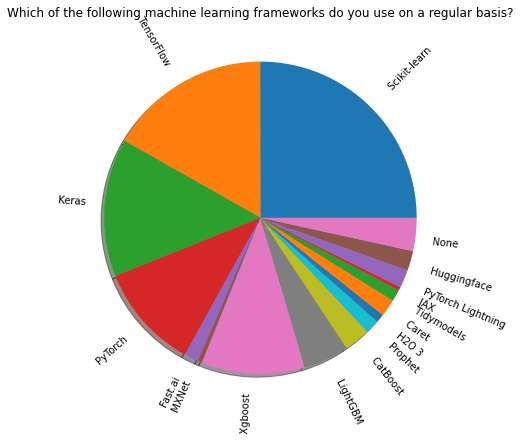

In [48]:
#Q16 Which of the following machine learning frameworks do you use on a regular basis?

def fav_mlFramework():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,18):
    data.append(df['Q16_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q16_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which of the following machine learning frameworks do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,rotatelabels=185)
  plt.show()

fav_mlFramework()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


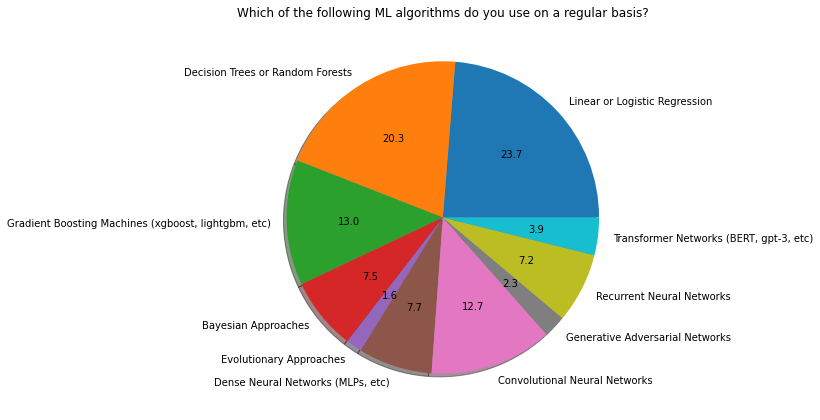

In [56]:
#Q17 Which of the following ML algorithms do you use on a regular basis?

def fav_mlAlgo():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,11):
    data.append(df['Q17_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q17_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which of the following ML algorithms do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,autopct="%1.1f")
  plt.show()

fav_mlAlgo()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


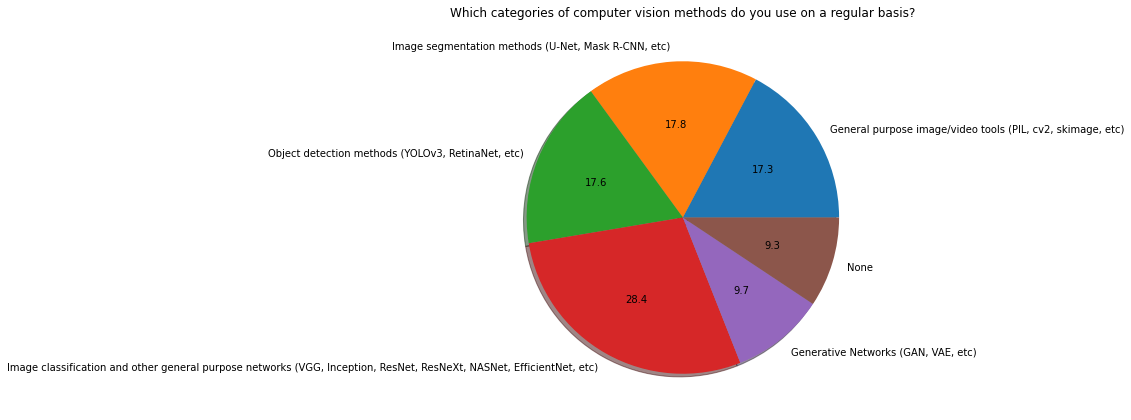

In [63]:
#Q18 Which categories of computer vision methods do you use on a regular basis?

def fav_CvAlgo():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,7):
    data.append(df['Q18_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q18_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which categories of computer vision methods do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,autopct="%1.1f")
  plt.show()

fav_CvAlgo()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


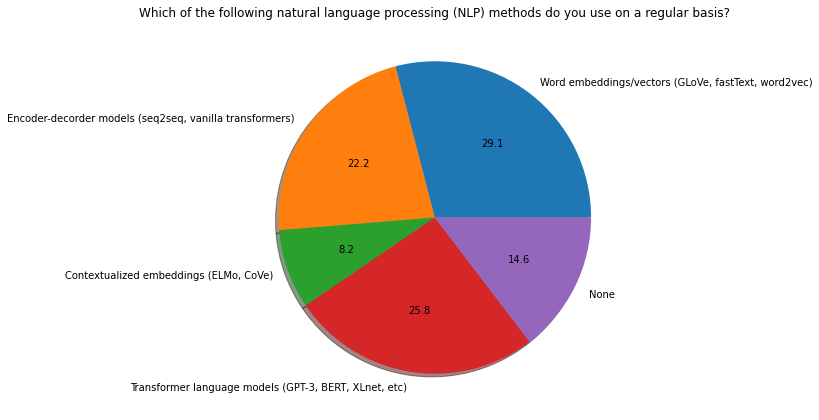

In [67]:
# Q19 Which of the following natural language processing (NLP) methods do you use on a regular basis?

def fav_CvAlgo():
  data=[]
  labels=[]
  legend_labels=[]
  for i in range(1,6):
    data.append(df['Q19_Part_'+str(i)].value_counts()[0:1].values)
    labels.append(df['Q19_Part_'+str(i)].value_counts()[0:1].keys()[0])

  for i in range(0,len(data)):
    temp=((data[i]/sum(data))*100).round(2)
    legend_labels.append(str(labels[i])+"- "+str(temp[0]))
  plt.figure(figsize=(7,10))
  plt.title("Which of the following natural language processing (NLP) methods do you use on a regular basis?")
  plt.pie(data,shadow=True,labels=labels,autopct="%1.1f")
  plt.show()

fav_CvAlgo()


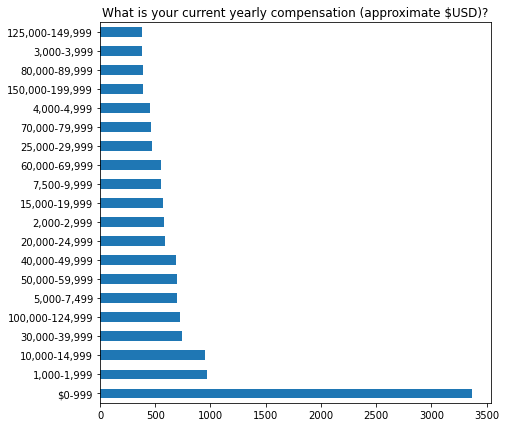

In [72]:
# Q25 What is your current yearly compensation (approximate $USD)?
bar_chart(columns[126],df,126)

Lets look at the yearly compensation for India vs USA

Text(0.5, 1.0, 'Compensation in US')

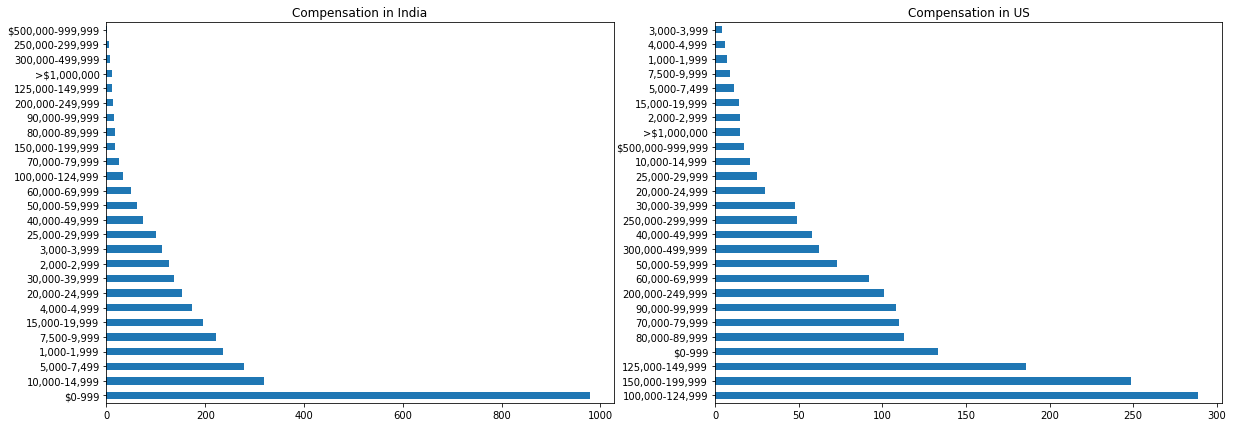

In [93]:
plt.figure(figsize=(20,7))
plt.subplot(121)
df[df['Q3']=='India'][columns[126]].value_counts().plot(kind="barh")
plt.title("Compensation in India")
plt.subplot(122)
df[df['Q3']=='United States of America'][columns[126]].value_counts().plot(kind="barh")
plt.title("Compensation in US")

By just looking at both the plots its completely clear what is the diffrence between the annual compenstation in India vs in US. The 0-999$ can be assumed as the compenstation for a students

Lets look at the data scientist and data analyst compenstation in India

Text(0.5, 1.0, 'Compenstation in India for Data Analyst')

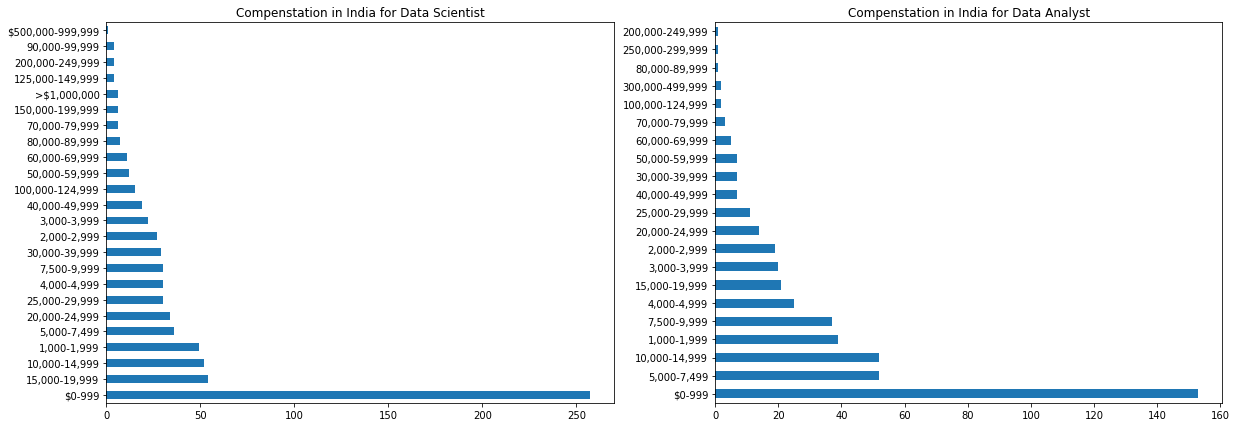

In [92]:
#Its clear that the compensation for data scientist is double that of data analyst
plt.figure(figsize=(20,7))
plt.subplot(121)
df[(df['Q3']=='India') & (df['Q5']=="Data Scientist")][columns[126]].value_counts().plot(kind="barh")
plt.title("Compensation in India for Data Scientist")
plt.subplot(122)
df[(df['Q3']=='India') & (df['Q5']=="Data Analyst")][columns[126]].value_counts().plot(kind="barh")
plt.title("Compensation in India for Data Analyst")

The important points from Section 4 are:

<ul>
<li>Scikit-learn, keras and pytorch are the most popular framework, however though xg boost is a boosting library yet it gives tough competition to the state of the art frameworks like keras and torch.
<li> The most popular ML algorithm is Linear/Logistic regression followed by ensemble based methods. Deep learning techniques like MLPs, CNN, etc are also getting popularity due to their ability to work on large amount of data.
<li>In Computer Vision, pre-trained models like VGG, Inception are very popular for Image classfication, whereas for Object detection yoloV3,RetineNet,GAN,etc.
<li> In NLP, Word Embedding methods are currently in use, however huge amount of research is going on in the field of NLP and state of the art transformer based model like GPT3,Bert,etc are getting popularity.
<li> There is very large margin differnce between the compensation in US vs the compensation in India. 


<h1> In the same way other questions can be analyzed and visualized<br><br>Thank You</h1>